<h1 align="center"><strong>Churn preprocessing code</strong></h1>

<body>
    <div style = "
        width: 100%;
        height: 30px;
        background: linear-gradient(to right,rgb(235, 238, 212),rgb(235, 238, 212));">
    </div>
</body>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

sns.set_theme()

In [2]:
df = pd.read_csv('../data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
display(df.shape)
display(df.columns.tolist())

(10000, 14)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 2.6 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [7]:
df.nunique().sort_values(ascending=False)

RowNumber          10000
CustomerId         10000
EstimatedSalary     9999
Balance             6382
Surname             2932
CreditScore          460
Age                   70
Tenure                11
NumOfProducts          4
Geography              3
Gender                 2
HasCrCard              2
IsActiveMember         2
Exited                 2
dtype: int64

In [8]:
df.drop(labels=['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [9]:
df.isnull().sum().to_frame().rename(columns={0:'Total No. of Missing Values'})

,Total No. of Missing Values
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [10]:
df.duplicated().sum()

0

Balance Ratio: 3.91 (1.0 = perfectly balanced)


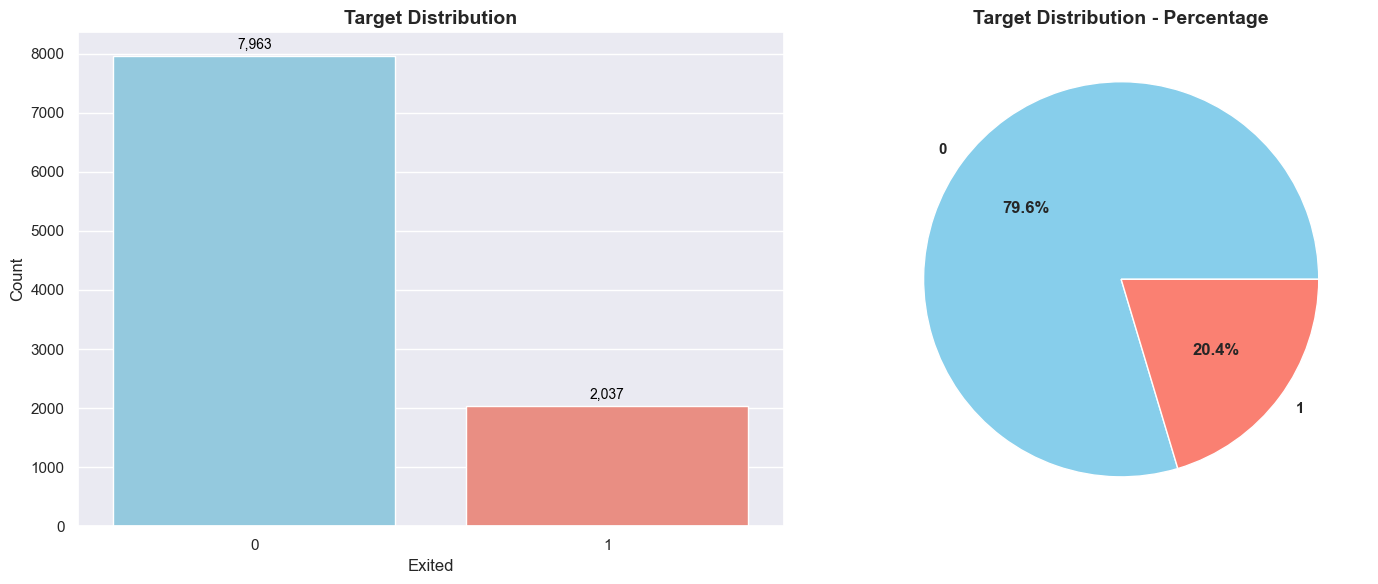

In [11]:
def target_distribution(df, target, task, title='Target Distribution', color=['skyblue', 'salmon'], Log=None):
    if task == 'classification':
        counts = df[target].value_counts()
        balance_ratio = counts.max() / counts.min() if counts.min() > 0 else float('inf')
        print(f"Balance Ratio: {balance_ratio:.2f} (1.0 = perfectly balanced)")
        _, axs = plt.subplots(1, 2, figsize=(15, 6))
        
        # Barplot on left subplot
        ax = axs[0]
        sns.barplot(x=counts.index, y=counts.values, palette=color, ax=ax)
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height()):,}",(p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
        ax.set_title(title, fontsize=14, weight='bold')
        ax.set_xlabel(target)
        ax.set_ylabel('Count')
        if Log:
            ax.set_yscale('log')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        
        # Pie chart on right subplot
        ax2 = axs[1]
        ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=color,textprops={'fontweight': 'bold'}, explode=[0]*len(counts))
        ax2.set_title(f"{title} - Percentage", fontsize=14, weight='bold')
        
        plt.tight_layout()
        plt.show()
    
    elif task == 'regression':
        sns.set_theme()
        sns.histplot(df[target], kde=True, bins=30)
        plt.title(title)
        plt.xlabel(target)
        plt.ylabel('Count')
        plt.show()

target_distribution(df, 'Exited', task='classification')

In [12]:
def get_column_types(df, numerics=[np.number], show_summary=True):
    """Identify numerical and categorical columns in a DataFrame."""
    from itertools import zip_longest
    
    # Numeric columns
    numerical_columns = df.select_dtypes(include=numerics).columns.tolist()
    
    # Categorical columns
    categorical_columns = df.select_dtypes(exclude=numerics).columns.tolist()
    
    if show_summary:
        print(f"Column Type Summary:")
        print(f"   Numerical   : {len(numerical_columns)} columns")
        print(f"   Categorical : {len(categorical_columns)} columns")
        print(f"   Total       : {len(df.columns)} columns")
        
        print("\n Numerical Columns                                     | Categorical Columns")
        print("==========================================================================================")
        for i, (num, cat) in enumerate(zip_longest(numerical_columns, categorical_columns, fillvalue='')):
            print(f"{i+1:2d}. {num:<50} | {cat:<28}")
    
    return numerical_columns, categorical_columns

numerical_features, categorical_features = get_column_types(df)

Column Type Summary:
   Numerical   : 9 columns
   Categorical : 2 columns
   Total       : 11 columns

 Numerical Columns                                     | Categorical Columns
 1. CreditScore                                        | Geography                   
 2. Age                                                | Gender                      
 3. Tenure                                             |                             
 4. Balance                                            |                             
 5. NumOfProducts                                      |                             
 6. HasCrCard                                          |                             
 7. IsActiveMember                                     |                             
 8. EstimatedSalary                                    |                             
 9. Exited                                             |                             


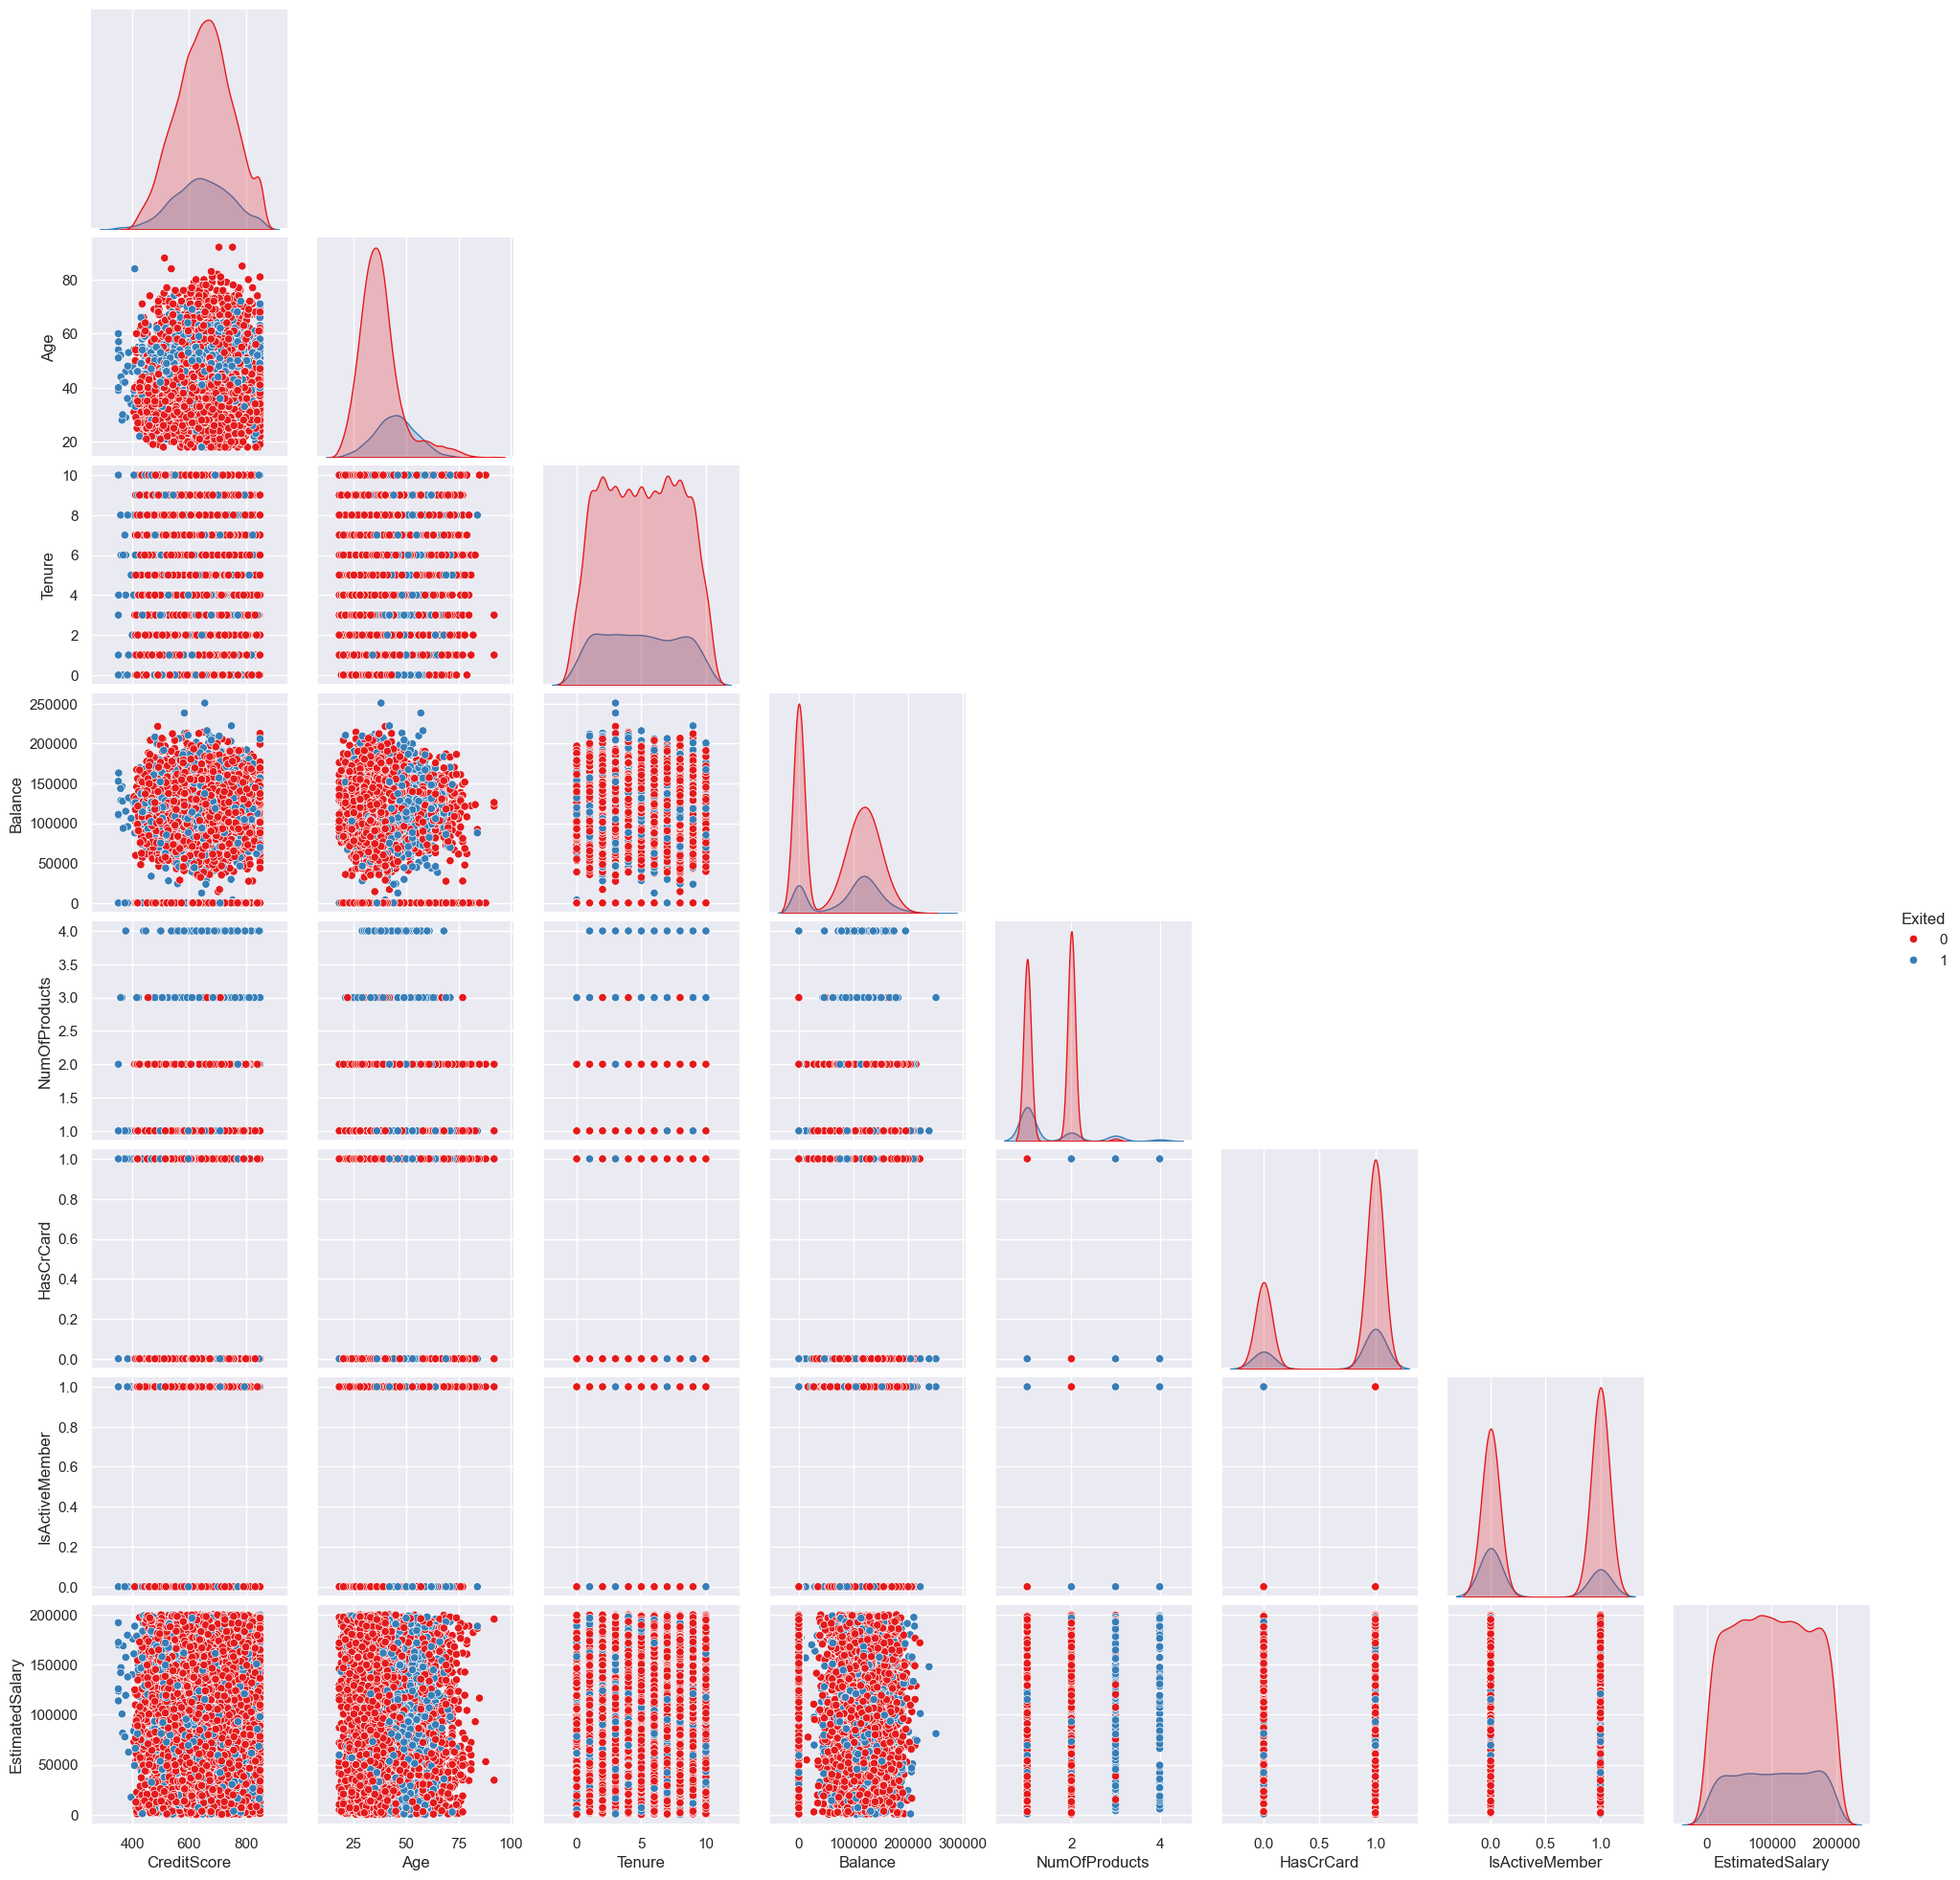

In [13]:
sns.pairplot(df[numerical_features],hue='Exited',diag_kind='kde',markers='o',palette='Set1',corner=True)
plt.show()

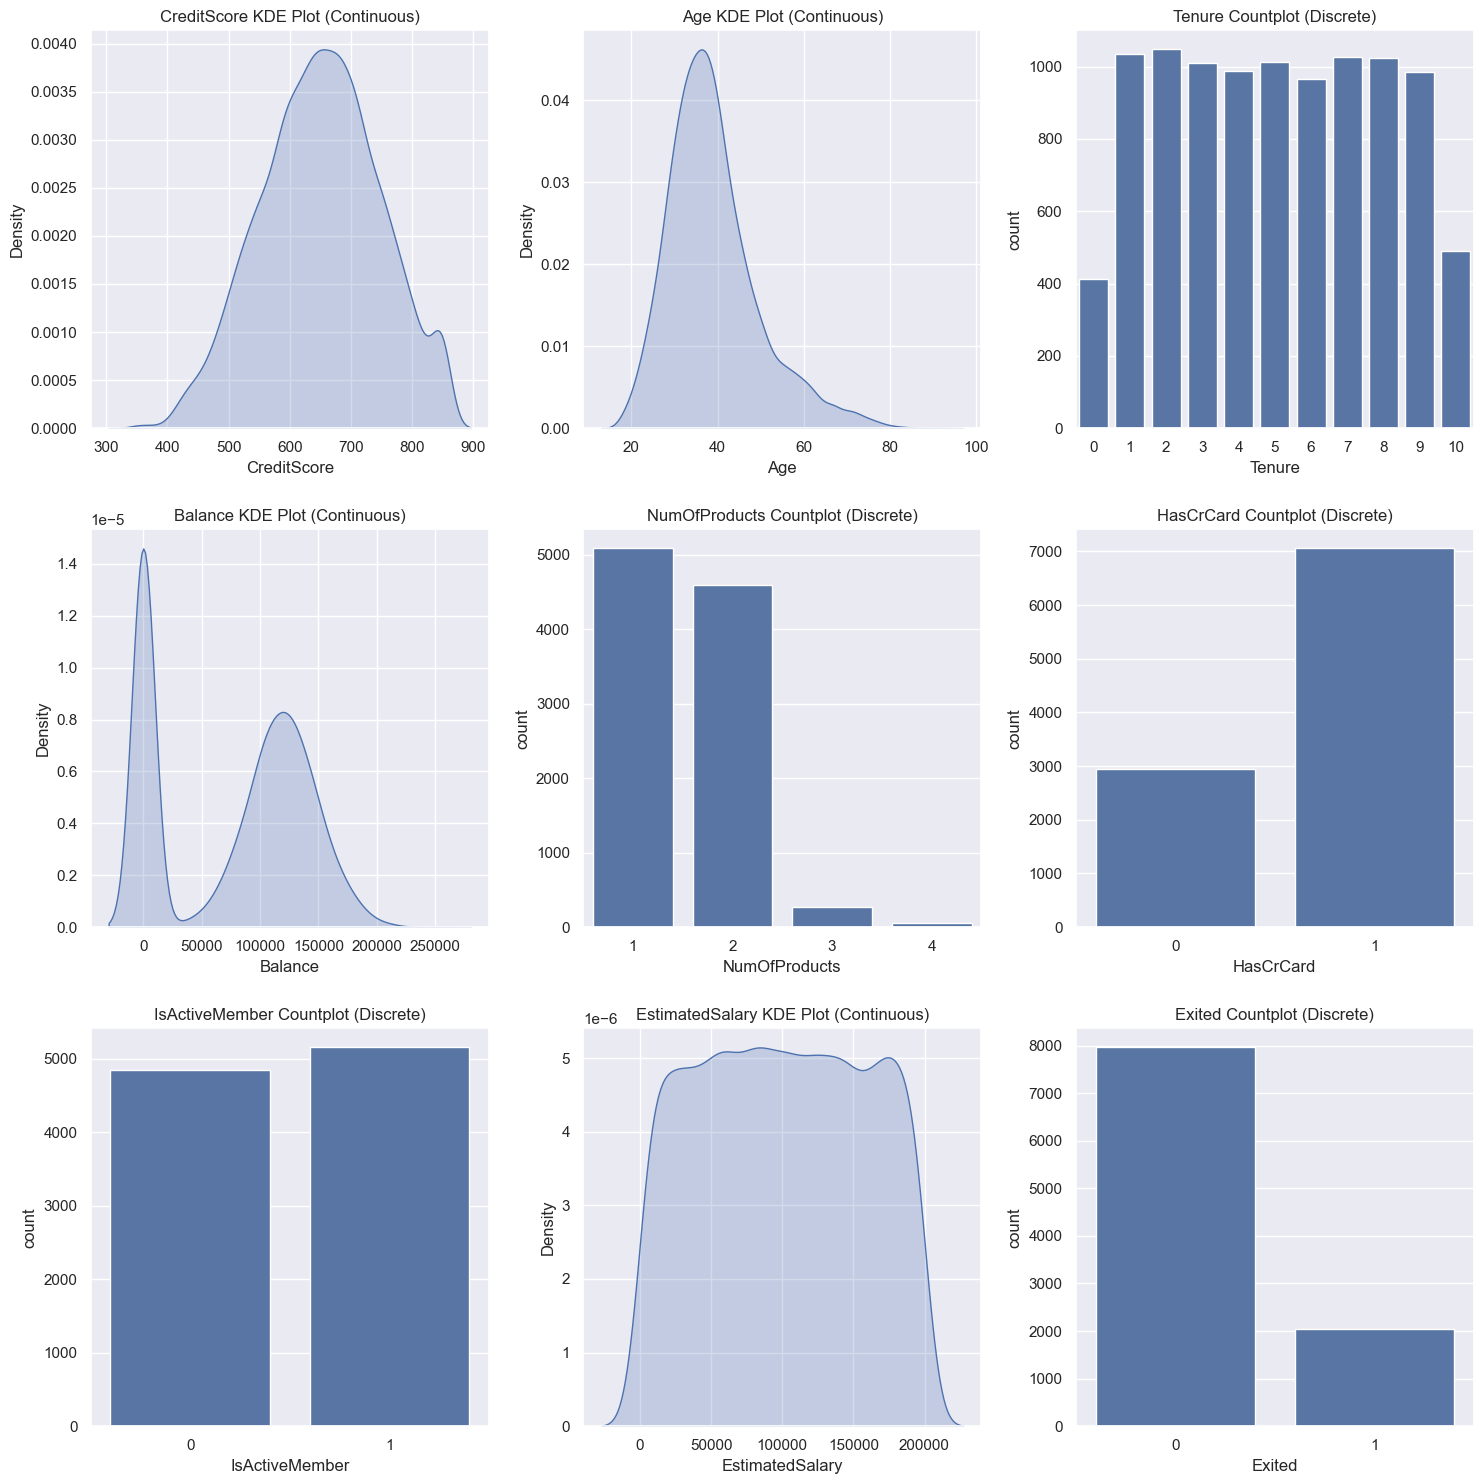

In [14]:
def plot_numeric_distributions(df, numeric_features, threshold=20, cols_per_row=3):
    # Calculate required rows
    n_rows = (len(numeric_features) + cols_per_row - 1) // cols_per_row
    plt.figure(figsize=(15, 5 * n_rows))
    
    for i, col in enumerate(numeric_features):
        plt.subplot(n_rows, cols_per_row, i + 1)
        unique_vals = df[col].nunique()
        
        # If column has <= threshold unique values → Discrete
        if unique_vals <= threshold:
            sns.countplot(x=col, data=df)
            plt.title(f'{col} Countplot (Discrete)')
        else:
            # Otherwise consider it Continuous
            sns.kdeplot(df[col], fill=True)
            plt.title(f'{col} KDE Plot (Continuous)')
    
    plt.tight_layout()
    plt.show()
    plt.close()

plot_numeric_distributions(df, numerical_features)

In [15]:
continuous_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

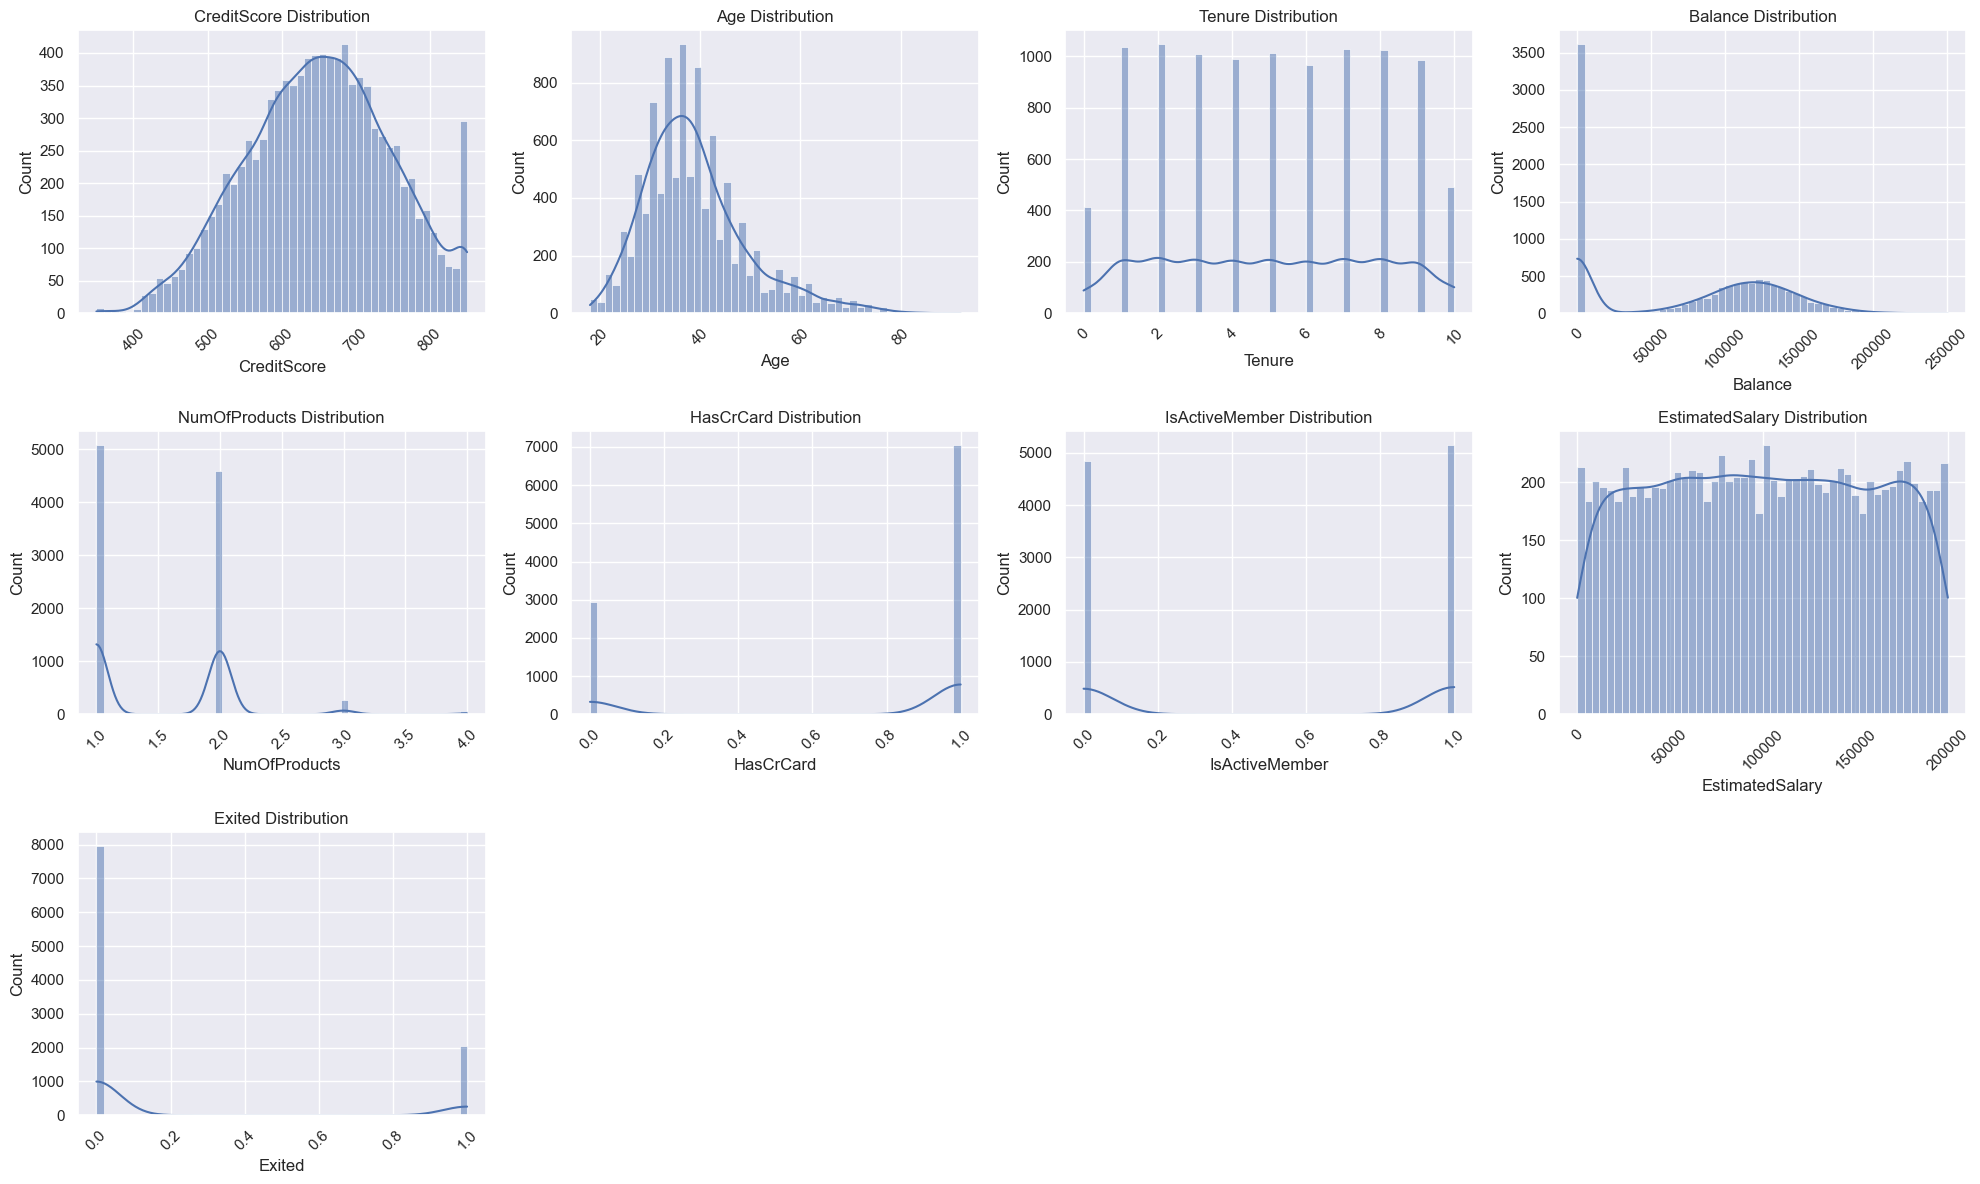

In [16]:
def plot_numeric_distributions_grid(df, numeric_features, cols_per_row=3, bins=30, rotation=0):
    # Calculate required rows
    n_rows = (len(numeric_features) + cols_per_row - 1) // cols_per_row
    plt.figure(figsize=(5 * cols_per_row, 4 * n_rows))
    
    for i, col in enumerate(numeric_features):
        plt.subplot(n_rows, cols_per_row, i + 1)
        sns.histplot(df[col], kde=True, bins=bins)
        plt.title(f'{col} Distribution')
        plt.xticks(rotation=rotation)
    
    plt.tight_layout()
    plt.show()

plot_numeric_distributions_grid(df, numerical_features, cols_per_row=4, bins=50, rotation=45)

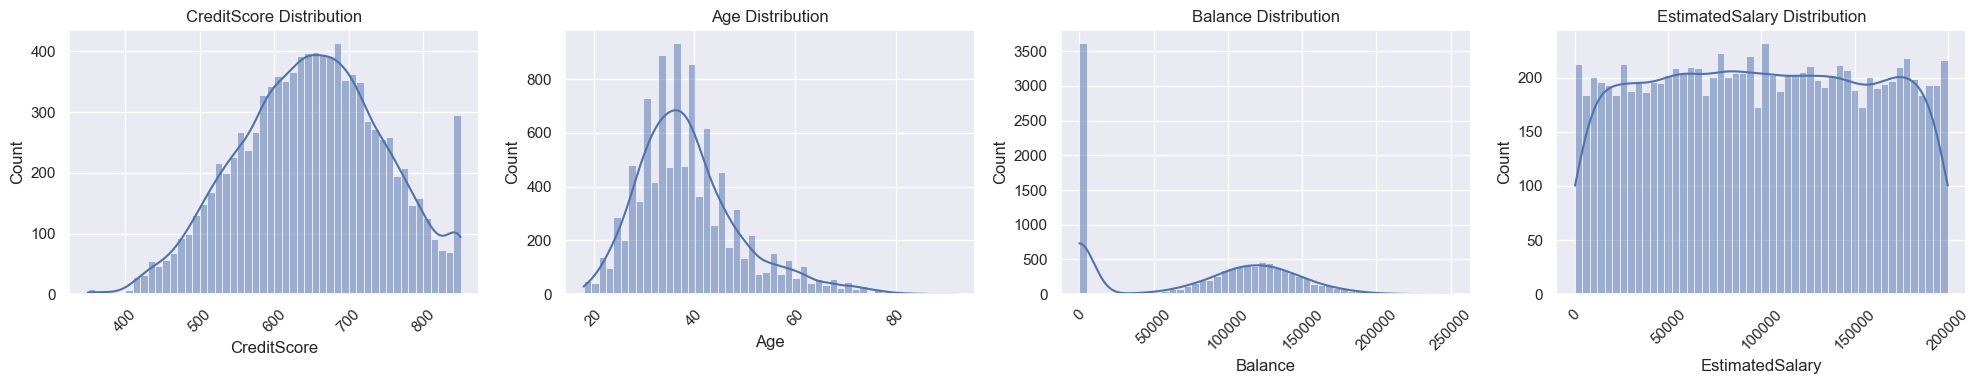

In [17]:
plot_numeric_distributions_grid(df, continuous_columns, cols_per_row=4, bins=50, rotation=45)

In [18]:
quantiles = df['Balance'].quantile([0, 0.25, 0.5, 0.75, 0.9, 1]).values     # to get the quantile values

bins = np.insert(quantiles[1:], 0, -0.01) 
labels = ['Zero', 'Low', 'Medium', 'Med-High', 'High']

old_col = df['Balance']

# Convert to categories
df['Balance'] = pd.cut(df['Balance'], bins=bins, labels=labels, right=True, include_lowest=True)

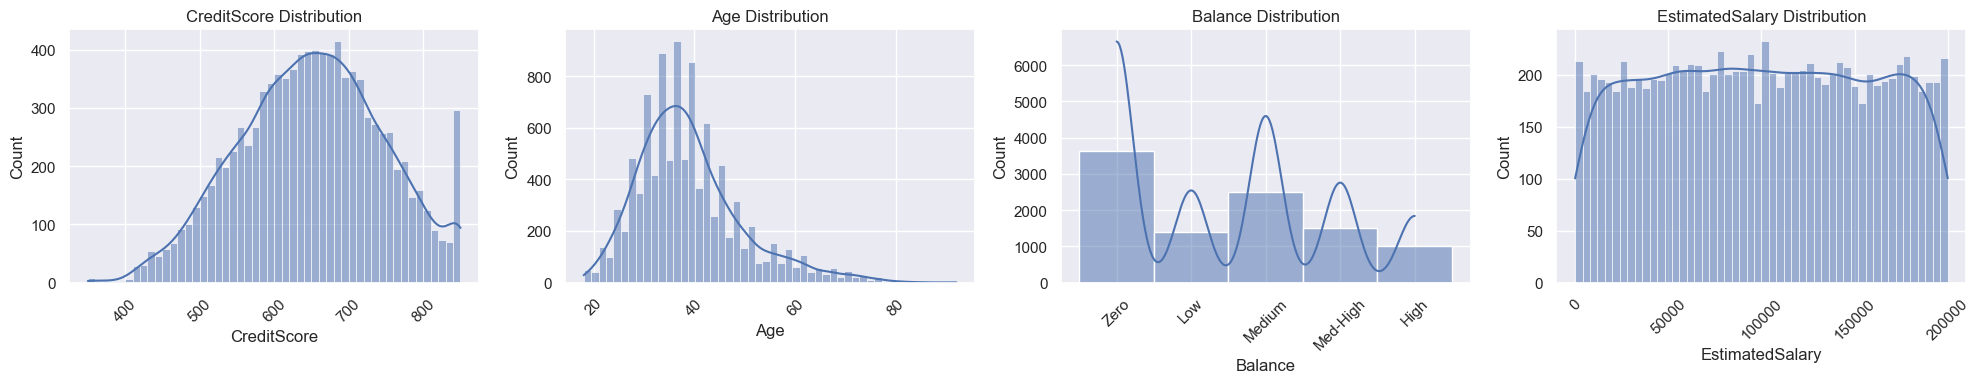

In [19]:
plot_numeric_distributions_grid(df, continuous_columns, cols_per_row=4, bins=50, rotation=45)

In [20]:
numerical_features, categorical_features = get_column_types(df)
continuous_columns = ['CreditScore', 'Age', 'EstimatedSalary']

Column Type Summary:
   Numerical   : 8 columns
   Categorical : 3 columns
   Total       : 11 columns

 Numerical Columns                                     | Categorical Columns
 1. CreditScore                                        | Geography                   
 2. Age                                                | Gender                      
 3. Tenure                                             | Balance                     
 4. NumOfProducts                                      |                             
 5. HasCrCard                                          |                             
 6. IsActiveMember                                     |                             
 7. EstimatedSalary                                    |                             
 8. Exited                                             |                             


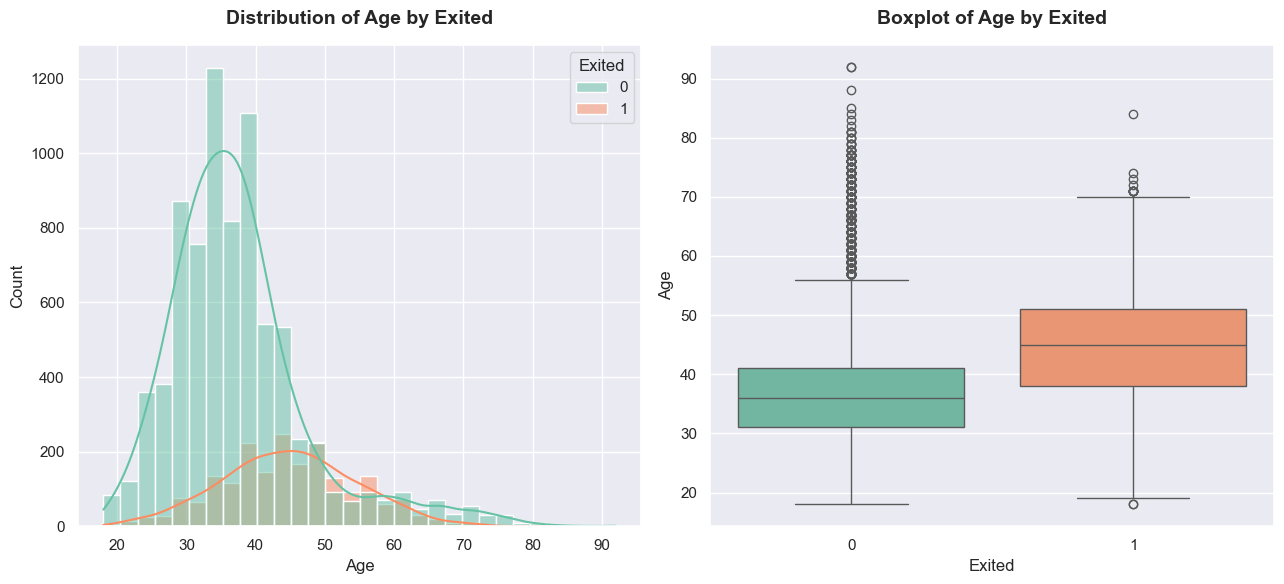

In [21]:
def plot_continuous_by_target(df, column, target, bins=30, palette="Set2", figsize=(13,6)):
    plt.figure(figsize=figsize)
    
    # Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=column, hue=target, kde=True, bins=bins, palette=palette)
    plt.title(f"Distribution of {column} by {target}", fontweight="bold", pad=15, fontsize=14)
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(data=df, y=column, x=target, palette=palette)
    plt.title(f"Boxplot of {column} by {target}", fontweight="bold", pad=15, fontsize=14)
    
    plt.tight_layout()
    plt.show()

plot_continuous_by_target(df, column="Age", target="Exited")

In [22]:
def data_quality(df):
    from pandas.api.types import is_numeric_dtype, is_object_dtype, CategoricalDtype
    missing = df.isnull().sum()
    missing_per = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        "Missing_Count"     : missing,
        "Missing_Percentage": missing_per,
        "Column_Type"       : ["Numeric" if is_numeric_dtype(df[c]) else "Categorical" if (is_object_dtype(df[c]) or isinstance(df[c].dtype, CategoricalDtype)) else "Other" for c in df.columns]
    }).query("Missing_Count > 0").sort_values("Missing_Percentage", ascending=False)
    if not missing_df.empty:
        def color_column_type(val):
            if val == "Numeric":
                return "background-color:#D6EAF8; color:#1B4F72; font-weight:bold;"
            elif val == "Categorical":
                return "background-color:#FADBD8; color:#641E16; font-weight:bold;"
            elif val == "Datetime":
                return "background-color:#E8F6F3; color:#0B5345; font-weight:bold;"
            else:
                return "background-color:#FDF2E9; color:#7D6608; font-weight:bold;"
        styled_df = (missing_df.style.applymap(color_column_type, subset=["Column_Type"])
                            .background_gradient(subset=["Missing_Percentage"], cmap="Oranges")
                            .format({"Missing_Count": "{:.0f}", "Missing_Percentage": "{:.2f}%"}))
        display(styled_df)
    else:
        print("No missing values detected.")
    return missing_df

missing_df = data_quality(df)

No missing values detected.


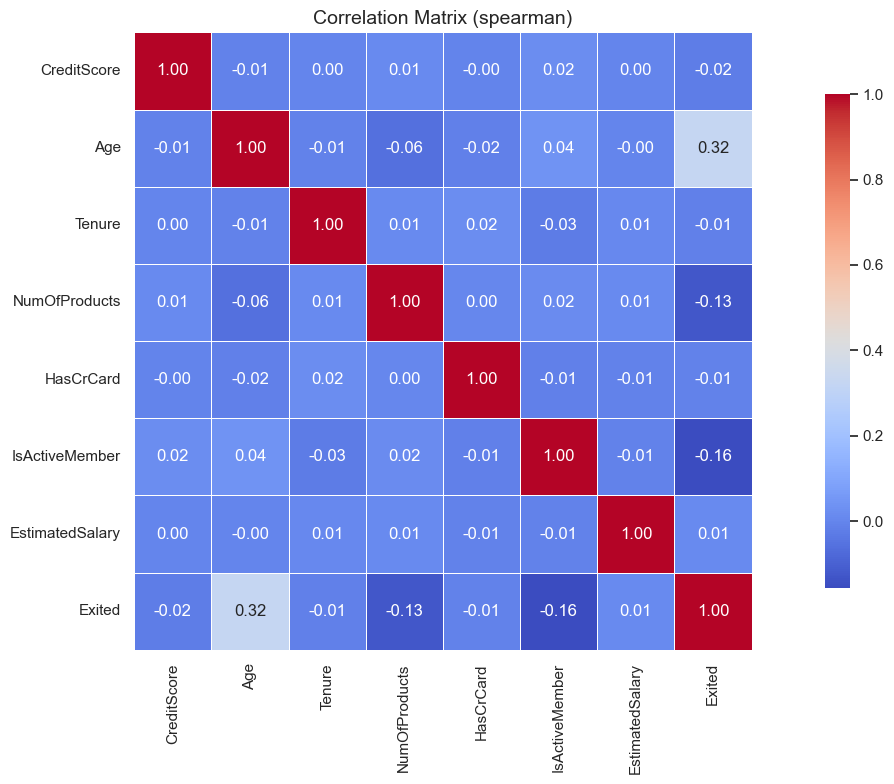

 High Correlations (threshold ≥ 0.3) 

🔹 Feature ←→ Target:
Age  ←→ Exited : 0.324


In [23]:
def plot_corr_matrix(df, continuous_columns=None, target: str = None, method: str = "pearson",
                    figsize: tuple = (15, 8), cmap: str = "coolwarm", linewidths: float = 0.5,
                    square: bool = True, fmt: str = ".2f", mask: bool = False, annot: bool = True,
                    title: str = None, threshold: float = 0.8, remove_target: str = None):
    """
    Extended to also print high correlations with target and between features.
    Optionally remove a column (e.g., target) from correlation matrix.
    """
    if continuous_columns is None:
        continuous_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    cols = continuous_columns.copy()
    if remove_target and remove_target in cols:
        cols.remove(remove_target)
    corr_matrix = df[cols].corr(method=method)
    mask_matrix = np.triu(np.ones_like(corr_matrix, dtype=bool)) if mask else None
    if title is None:
        title = f"Correlation Matrix ({method})"
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=annot, fmt=fmt, cmap=cmap, linewidths=linewidths, square=square, mask=mask_matrix, cbar_kws={"shrink": 0.8})
    plt.grid(False)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()
    
    results = {}
    print("="*60)
    print(f" High Correlations (threshold ≥ {threshold}) ")
    print("="*60)
    if target is not None and target in corr_matrix.columns:
        target_corr = corr_matrix[target].drop(target).dropna()
        strong_target_corr = target_corr[abs(target_corr) >= threshold]
        if not strong_target_corr.empty:
            print("\n🔹 Feature ←→ Target:")
            for feat, val in strong_target_corr.items():
                print(f"{feat}  ←→ {target} : {val:.3f}")
        results["target_corr"] = strong_target_corr
    else:
        results["target_corr"] = None
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            col1, col2 = corr_matrix.columns[i], corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]
            if target and (col1 == target or col2 == target):
                continue
            if abs(corr_val) >= threshold:
                high_corr_pairs.append((col1, col2, corr_val))
    if high_corr_pairs:
        print("\n🔹 Feature ←→ Feature:")
        for col1, col2, val in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
            print(f"{col1} ←→ {col2} : {val:.3f}")
    results["high_corr_pairs"] = high_corr_pairs
    results["corr_matrix"] = corr_matrix
    return results

results = plot_corr_matrix(df, continuous_columns=numerical_features, target="Exited", method="spearman", threshold=0.3)

Geography         ➤ (Unique values: 3) Top 20 Categories with 'others' combined
  France          : 50.14%
  Germany         : 25.09%
  Spain           : 24.77%
  others          : 0.00%


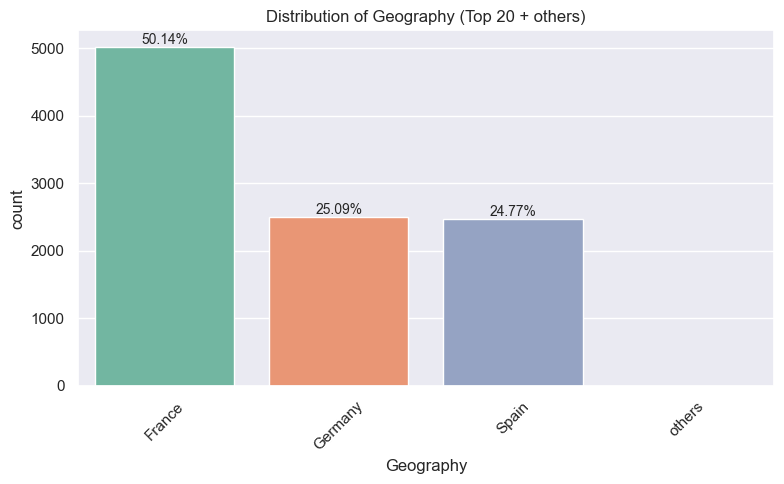

--------------------------------------------------
Gender            ➤ (Unique values: 2) Top 20 Categories with 'others' combined
  Male            : 54.57%
  Female          : 45.43%
  others          : 0.00%


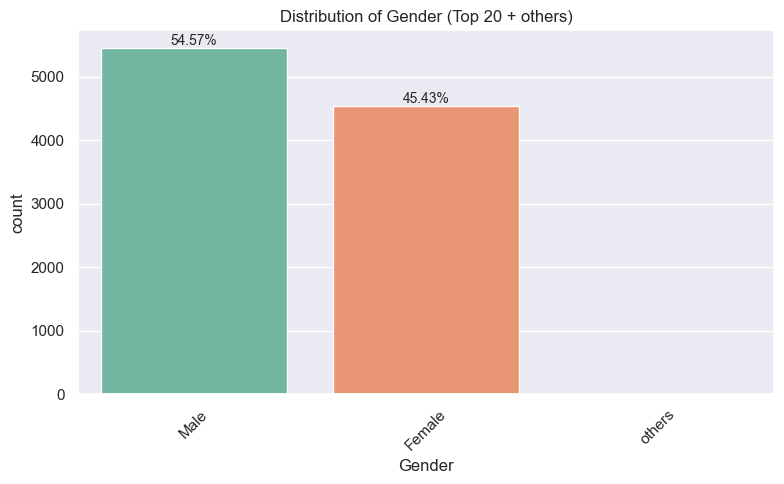

--------------------------------------------------
Balance           ➤ (Unique values: 5) Top 20 Categories with 'others' combined
  Zero            : 36.17%
  Medium          : 25.00%
  Med-High        : 15.00%
  Low             : 13.83%
  High            : 10.00%
  others          : 0.00%


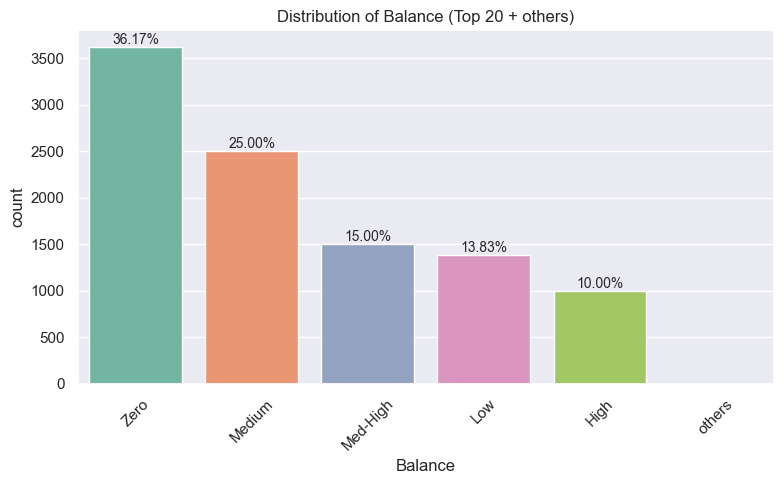

--------------------------------------------------


In [24]:
def categorical_summary_plot(df, categorical_features, top_n=20, figsize=(8,5), palette='Set2'):
    for col in categorical_features:
        n_unique = df[col].nunique()
        print(f"{col:<15}   ➤ (Unique values: {n_unique}) Top {top_n} Categories with 'others' combined")
        value_counts = df[col].value_counts(normalize=True)
        top_categories = value_counts.iloc[:top_n]
        others_sum = value_counts.iloc[top_n:].sum()
        combined = pd.concat([top_categories, pd.Series({'others': others_sum})])
        for category, proportion in combined.items():
            print(f"  {category:<15} : {proportion*100:.2f}%")
        plt.figure(figsize=figsize)
        plot_series = df[col].apply(lambda x: x if x in top_categories.index else 'others')
        ax = sns.countplot(x=plot_series, palette=palette, order=combined.index)
        total_count = len(df)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height/total_count*100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
        plt.title(f'Distribution of {col} (Top {top_n} + others)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        print('-'*50)

categorical_summary_plot(df, categorical_features, top_n=20)

In [25]:
balance_order = {'Zero': 0, 'Low': 1, 'Medium': 2, 'Med-High': 3, 'High': 4}
df['Balance'] = df['Balance'].map(balance_order)

###########################
gender_order = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(gender_order)
###########################
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

print(f"X_train shape: {X_train.shape}")
print(f"X_test  shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")
print(f"\nMissing values:")
print(f"X_train : {X_train.isnull().sum().sum()}")
print(f"X_test  : {X_test.isnull().sum().sum()}")
print(f"y_train : {y_train.isnull().sum().sum()}")
print(f"y_test  : {y_test.isnull().sum().sum()}")
###########################
# --- Geography ---
encoder   = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
train_geo = encoder.fit_transform(X_train[['Geography']])
test_geo  = encoder.transform(X_test[['Geography']])

train_geo = pd.DataFrame(train_geo, columns=encoder.get_feature_names_out(['Geography']), index=X_train.index)
test_geo  = pd.DataFrame(test_geo, columns=encoder.get_feature_names_out(['Geography']), index=X_test.index)

X_train = pd.concat([X_train.drop('Geography', axis=1), train_geo], axis=1)
X_test  = pd.concat([X_test.drop('Geography', axis=1), test_geo], axis=1)

X_train shape: (8000, 10)
X_test  shape: (2000, 10)
y_train shape: (8000,)
y_test  shape: (2000,)

Missing values:
X_train : 0
X_test  : 0
y_train : 0
y_test  : 0


In [26]:
def split_categorical_by_cardinality(df, categorical_cols=None, low_max=10, med_max=500):
    if categorical_cols is None:
        categorical_cols = df.select_dtypes(include=['object','category','bool']).columns.tolist()
    
    # Compute cardinalities
    cardinalities = {col: df[col].nunique() for col in categorical_cols}
    
    low_card  = [c for c in categorical_cols if cardinalities[c] <= low_max]
    med_card  = [c for c in categorical_cols if low_max < cardinalities[c] <= med_max]
    high_card = [c for c in categorical_cols if cardinalities[c] > med_max]
    
    numerical = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    
    # Debug print
    print(f"Low    cardinality columns ({len(low_card):<3}): {low_card}")
    print(f"Medium cardinality columns ({len(med_card):<3}): {med_card}")
    print(f"High   cardinality columns ({len(high_card):<3}): {high_card}\n")
    
    return low_card, med_card, high_card, numerical, cardinalities

low_card, med_card, high_card, numerical_cols, card_dict = split_categorical_by_cardinality(df, low_max=5, med_max=100)

Low    cardinality columns (2  ): ['Geography', 'Balance']
Medium cardinality columns (0  ): []
High   cardinality columns (0  ): []



In [27]:
# Calculate skewness for numeric features
skew_df = df[numerical_cols[:-1]].skew().to_frame(name='Feature Skewness')
skew_df['Feature Skewness'] = skew_df['Feature Skewness'].round(3)

# Highlight highly skewed features (|skew| > 1)
def highlight_skew(s):
    is_skewed = s.abs() > 1
    return ['background-color: red' if v else '' for v in is_skewed]

styled_skew_df = skew_df.style.apply(highlight_skew, subset=['Feature Skewness'])
styled_skew_df

,Feature Skewness
CreditScore,-0.072000
Gender,-0.184000
Age,1.011000
Tenure,0.011000
NumOfProducts,0.746000
HasCrCard,-0.902000
IsActiveMember,-0.060000
EstimatedSalary,0.002000


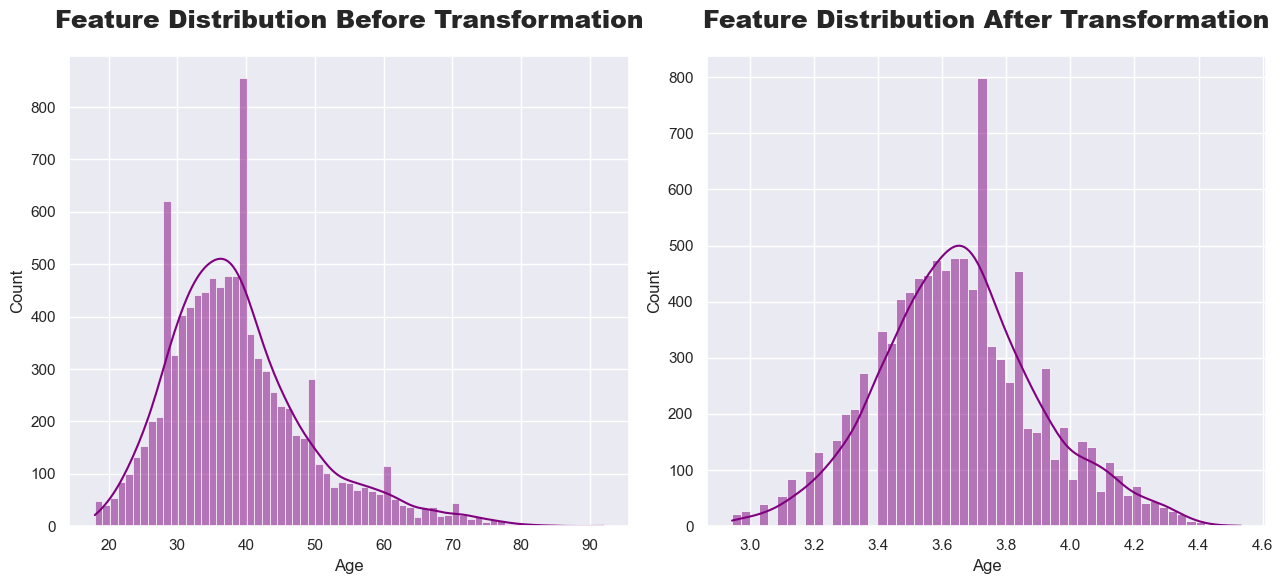

In [28]:
old_val = df['Age']
df['Age'] = np.log1p(df['Age'])  # log(1+x) to handle zeros
new_val = df['Age']

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_val, color='purple', kde=True)
plt.title('Feature Distribution Before Transformation', fontweight='black', size=18, pad=20)

plt.subplot(1,2,2)
sns.histplot(new_val, color='purple', kde=True)
plt.title('Feature Distribution After Transformation', fontweight='black', size=18, pad=20)
plt.tight_layout()
plt.show()

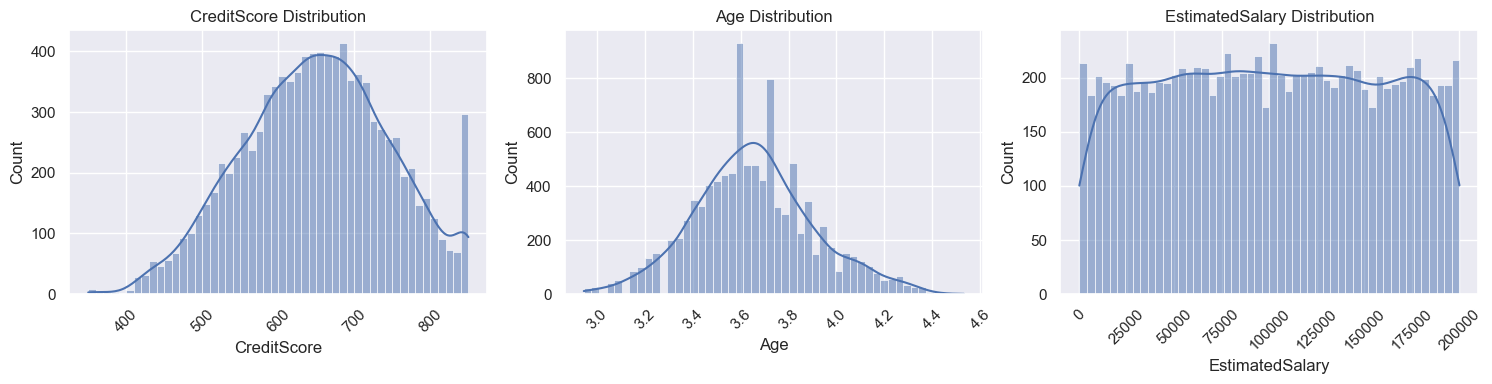

In [29]:
plot_numeric_distributions_grid(df, continuous_columns, cols_per_row=4, bins=50, rotation=45)

Initialized OutlierHandler with 7 numerical columns.


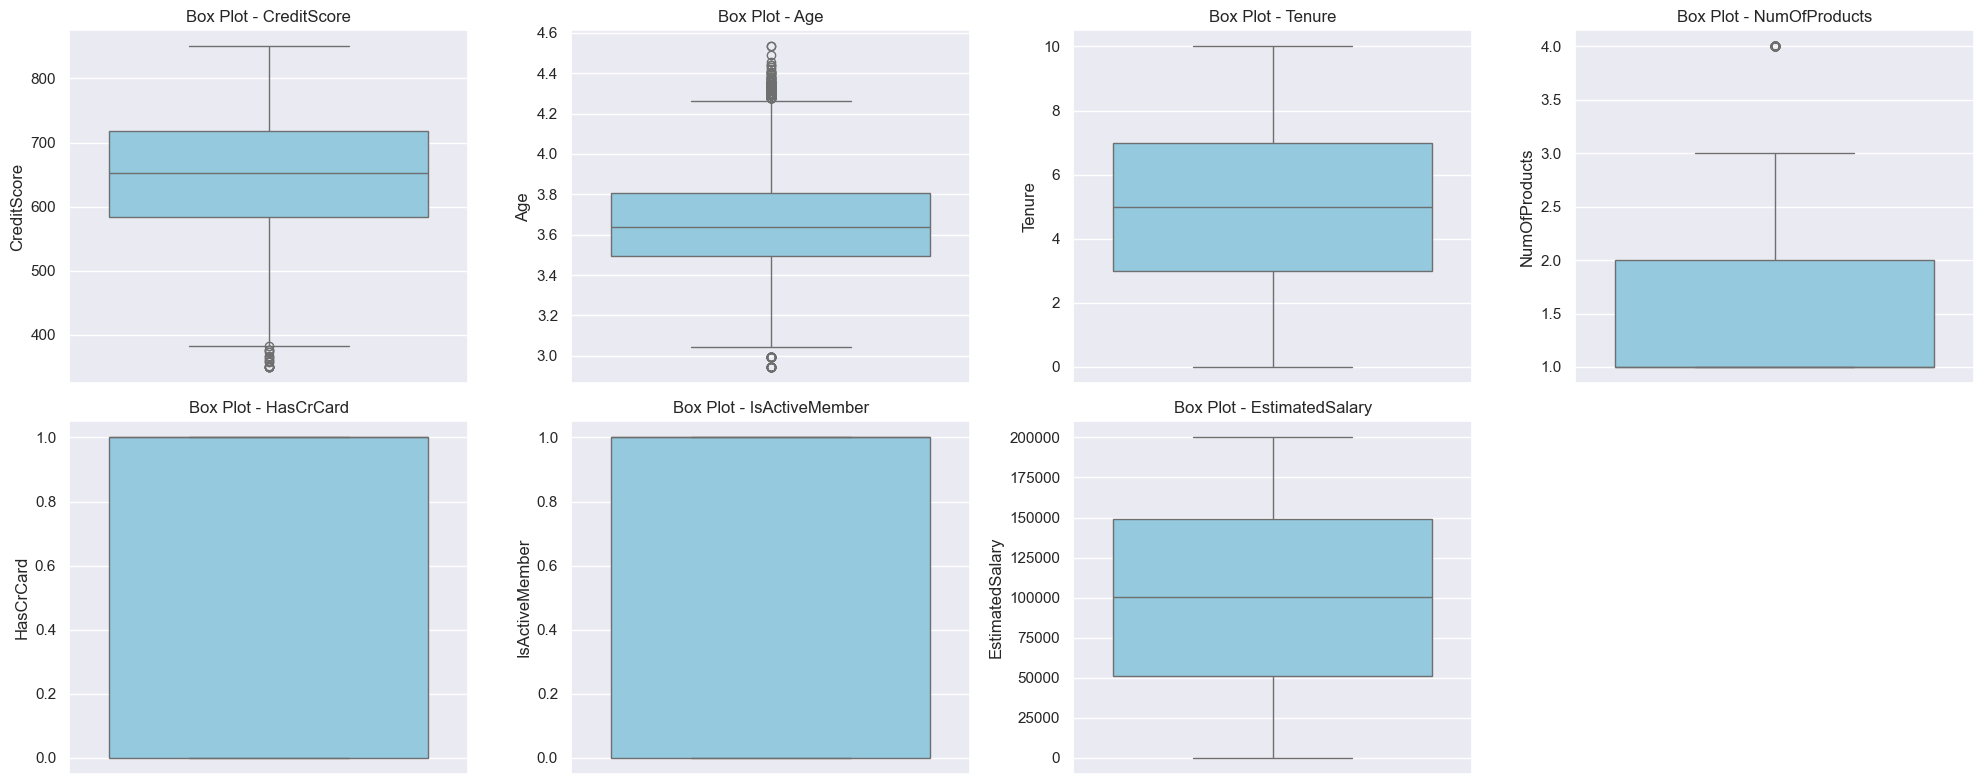

CreditScore      : 15    outliers
Age              : 182   outliers
Tenure           : 0     outliers
NumOfProducts    : 60    outliers
HasCrCard        : 0     outliers
IsActiveMember   : 0     outliers
EstimatedSalary  : 0     outliers


In [30]:
class OutlierHandler:
    """A class to handle outlier detection, visualization, and handling using IQR method."""
    def __init__(self, df, numerical_cols):
        self.df = df.copy()
        self.numerical_cols = numerical_cols
        print(f"Initialized OutlierHandler with {len(self.numerical_cols)} numerical columns.")

    def detect_outliers_iqr(self, feature):
        Q1 = self.df[feature].quantile(0.25)
        Q3 = self.df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return self.df[(self.df[feature] < lower_bound) | (self.df[feature] > upper_bound)]

    def plot_outliers(self, n_cols=6, color='skyblue'):
        import math
        n_rows = math.ceil(len(self.numerical_cols) / n_cols)
        plt.figure(figsize=(5 * n_cols, 4 * n_rows))
        for i, col in enumerate(self.numerical_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            sns.boxplot(y=self.df[col], color=color)
            plt.title(f'Box Plot - {col}')
        plt.tight_layout()
        plt.show()

    def cap_outliers_iqr(self):
        for feature in self.numerical_cols:
            Q1 = self.df[feature].quantile(0.25)
            Q3 = self.df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            self.df[feature] = np.where(
                self.df[feature] < lower_bound, lower_bound,
                np.where(self.df[feature] > upper_bound, upper_bound, self.df[feature])
            )
        return self.df

    def interpolate_outliers(self, method='linear'):
        for feature in self.numerical_cols:
            Q1 = self.df[feature].quantile(0.25)
            Q3 = self.df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace outliers with NaN
            self.df[feature] = self.df[feature].apply(
                lambda x: np.nan if x < lower_bound or x > upper_bound else x
            )
            # Fill outliers using interpolation
            self.df[feature] = self.df[feature].interpolate(method=method, limit_direction='both')
        return self.df

    def summary_outliers(self):
        """Print number of outliers in each numerical column."""
        for col in self.numerical_cols:
            outliers = self.detect_outliers_iqr(col)
            print(f"{col:<17}: {len(outliers):<5} outliers")

# ================= Usage Example =================
handler = OutlierHandler(df, numerical_features[:-1])  # exclude target if needed
handler.plot_outliers(n_cols=4)
handler.summary_outliers()

In [31]:
# --- Option 1: Cap outliers ---
df_capped = handler.cap_outliers_iqr()
handler.summary_outliers()

CreditScore      : 0     outliers
Age              : 0     outliers
Tenure           : 0     outliers
NumOfProducts    : 0     outliers
HasCrCard        : 0     outliers
IsActiveMember   : 0     outliers
EstimatedSalary  : 0     outliers


In [32]:
# --- Option 2: Interpolate outliers ---
df_interpolated = handler.interpolate_outliers(method='linear')  # or 'spline', 'polynomial'
handler.summary_outliers()

CreditScore      : 0     outliers
Age              : 0     outliers
Tenure           : 0     outliers
NumOfProducts    : 0     outliers
HasCrCard        : 0     outliers
IsActiveMember   : 0     outliers
EstimatedSalary  : 0     outliers


In [33]:
def selective_scaling(X_train: pd.DataFrame, X_test: pd.DataFrame, threshold=100): 
    # Only select numeric columns (exclude categorical/object)
    candidate_cols = [col for col in X_train.columns if not col.startswith("cat__high_card__") and pd.api.types.is_numeric_dtype(X_train[col])]
    
    range_per_col = (X_train[candidate_cols].max() - X_train[candidate_cols].min()).sort_values(ascending=False)
    display(range_per_col)
    
    cols_to_scale = range_per_col[range_per_col > threshold].index.tolist()
    print("Columns to scale:", cols_to_scale if cols_to_scale else "None ✅")
    
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled  = X_test.copy()
    
    if cols_to_scale:
        X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
        X_test_scaled[cols_to_scale]  = scaler.transform(X_test[cols_to_scale])
    
    return X_train_scaled, X_test_scaled, cols_to_scale, scaler

X_train, X_test, _, _ = selective_scaling(X_train, X_test)

EstimatedSalary      199880.67
CreditScore             500.00
Age                      74.00
Tenure                   10.00
NumOfProducts             3.00
Gender                    1.00
HasCrCard                 1.00
IsActiveMember            1.00
Geography_Germany         1.00
Geography_Spain           1.00
dtype: float64

Columns to scale: ['EstimatedSalary', 'CreditScore']


In [64]:
def classification_evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model", plot=True, verbose=True):
    import time
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import (accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score)
    start_time = time.time()
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    # Probabilities (if available)
    y_test_proba = None
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)
    
    # Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)
    bal_acc   = balanced_accuracy_score(y_test, y_test_pred)
    
    # Extra metrics
    f1_macro  = f1_score(y_test, y_test_pred, average="macro")
    f1_micro  = f1_score(y_test, y_test_pred, average="micro")
    
    end_time = time.time()
    elapsed  = end_time - start_time
    
    if verbose:
        print(f"{'='*60}")
        print(f"Evaluation results: {model_name}")
        print(f"{'='*60}")
        print(f"--------- Accuracy ---------")
        print(f"Training Accuracy : {train_acc:.4f}")
        print(f"Testing  Accuracy : {test_acc:.4f}")
        print(f"Balanced Accuracy : {bal_acc:.4f}")
        print(f"Difference        : {abs(train_acc - test_acc):.4f}")
        if abs(train_acc - test_acc) > 0.05:
            print("⚠️ Possible overfitting detected!")
        else:
            print("✅ Good generalization!")
        
        print(f"\n--------- Extra Metrics (Test Set) ---------")
        print(f"F1 (Macro) : {f1_macro:.4f}")
        print(f"F1 (Micro) : {f1_micro:.4f}")
        
        print(f"\n--------- Classification Report ---------")
        print(classification_report(y_test, y_test_pred))
    
    # Plots (subplot style)
    if plot:
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor='white',cbar=True, square=True, annot_kws={"size": 14, "weight": "bold"}, ax=axes[0])
        axes[0].set_xlabel("Predicted Label", fontsize=12)
        axes[0].set_ylabel("True Label", fontsize=12)
        axes[0].set_title(f"Confusion Matrix - {model_name}", fontsize=14)
        
        # ROC Curve
        auc = None
        if y_test_proba is not None:
            if y_test_proba.shape[1] == 2:  # Binary
                y_score = y_test_proba[:, 1]
                auc = roc_auc_score(y_test, y_score)
                fpr, tpr, _ = roc_curve(y_test, y_score)
                axes[1].plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC={auc:.3f})')
                axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
                axes[1].set_xlabel('False Positive Rate', fontsize=12)
                axes[1].set_ylabel('True Positive Rate', fontsize=12)
                axes[1].set_title(f'ROC Curve - {model_name}', fontsize=14)
                axes[1].legend()
                axes[1].grid(True, alpha=0.3)
            else:  # Multi-class
                auc = roc_auc_score(y_test, y_test_proba, multi_class="ovr")
                axes[1].axis("off")
                axes[1].text(0.5, 0.5, f"Multi-class AUC (OVR): {auc:.3f}", ha="center", va="center", fontsize=14, weight="bold")
        else:
            axes[1].axis("off")
            axes[1].text(0.5, 0.5, "No Probabilities Available", ha="center", va="center", fontsize=12, style="italic")
        
        plt.tight_layout()
        plt.show()
    
    return {
        "train_acc": train_acc,
        "test_acc": test_acc,
        "bal_acc": bal_acc,
        "f1_macro": f1_macro,
        "f1_micro": f1_micro,
        "auc": auc,
        "time_sec": elapsed
    }

Evaluation results: Logistic Regression
--------- Accuracy ---------
Training Accuracy : 0.8101
Testing  Accuracy : 0.8130
Balanced Accuracy : 0.5838
Difference        : 0.0029
✅ Good generalization!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.5971
F1 (Micro) : 0.8130

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.57      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.60      2000
weighted avg       0.78      0.81      0.78      2000



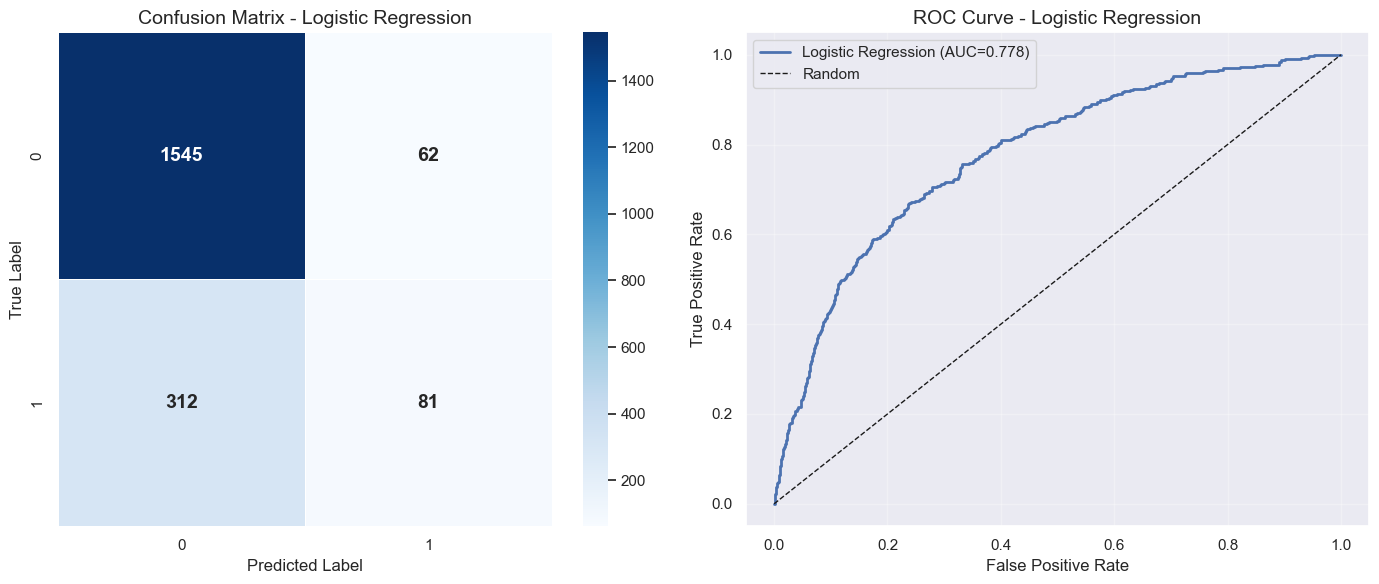

In [65]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LR_results = classification_evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression")  

Evaluation results: Random Forest
--------- Accuracy ---------
Training Accuracy : 1.0000
Testing  Accuracy : 0.8620
Balanced Accuracy : 0.7094
Difference        : 0.1380
⚠️ Possible overfitting detected!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.7420
F1 (Micro) : 0.8620

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



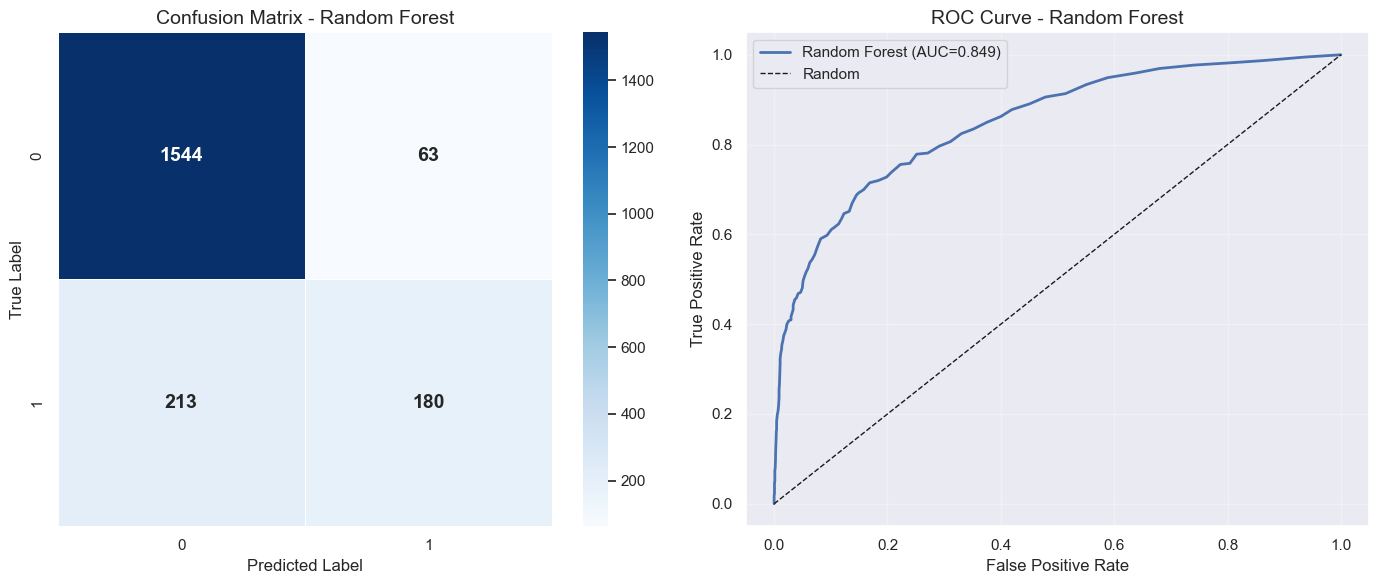

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
rf_model.fit(X_train, y_train)

RF_results = classification_evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

Evaluation results: Support Vector Classifier
--------- Accuracy ---------
Training Accuracy : 0.7945
Testing  Accuracy : 0.8035
Balanced Accuracy : 0.5000
Difference        : 0.0090
✅ Good generalization!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.4455
F1 (Micro) : 0.8035

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



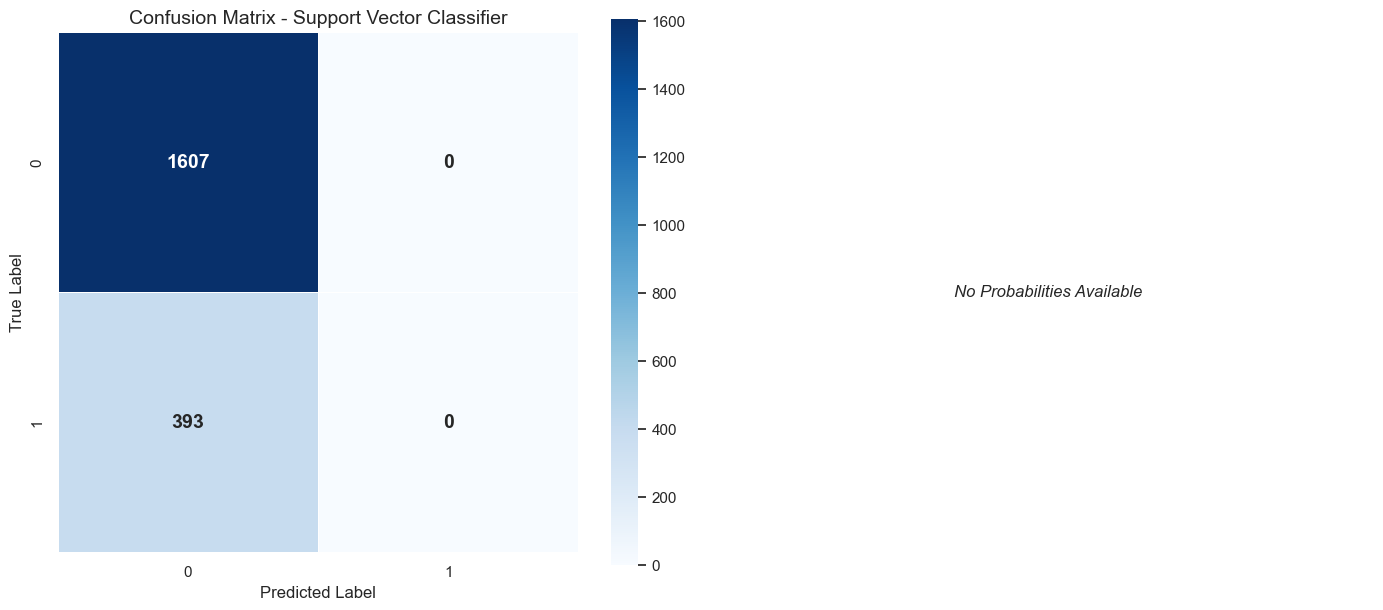

In [67]:
from sklearn.svm import SVC

svc_model = SVC(
    kernel='rbf',
    random_state=42
)
svc_model.fit(X_train, y_train)

SVC_results = classification_evaluate_model(svc_model, X_train, X_test, y_train, y_test, "Support Vector Classifier")

Evaluation results: Gradient Boosting
--------- Accuracy ---------
Training Accuracy : 0.8726
Testing  Accuracy : 0.8630
Balanced Accuracy : 0.7158
Difference        : 0.0096
✅ Good generalization!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.7471
F1 (Micro) : 0.8630

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



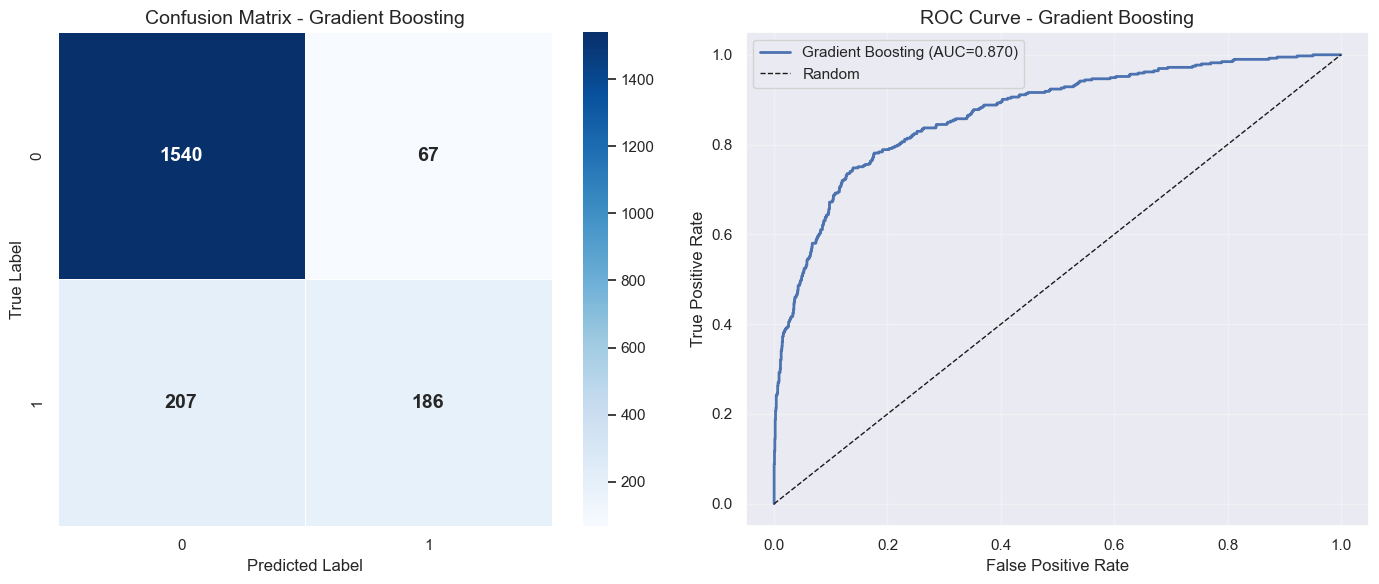

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
gb_model.fit(X_train, y_train)

GB_results = classification_evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting")

Evaluation results: K-Nearest Neighbors
--------- Accuracy ---------
Training Accuracy : 0.8614
Testing  Accuracy : 0.8225
Balanced Accuracy : 0.6473
Difference        : 0.0389
✅ Good generalization!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.6686
F1 (Micro) : 0.8225

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.86      0.94      0.89      1607
           1       0.58      0.36      0.44       393

    accuracy                           0.82      2000
   macro avg       0.72      0.65      0.67      2000
weighted avg       0.80      0.82      0.81      2000



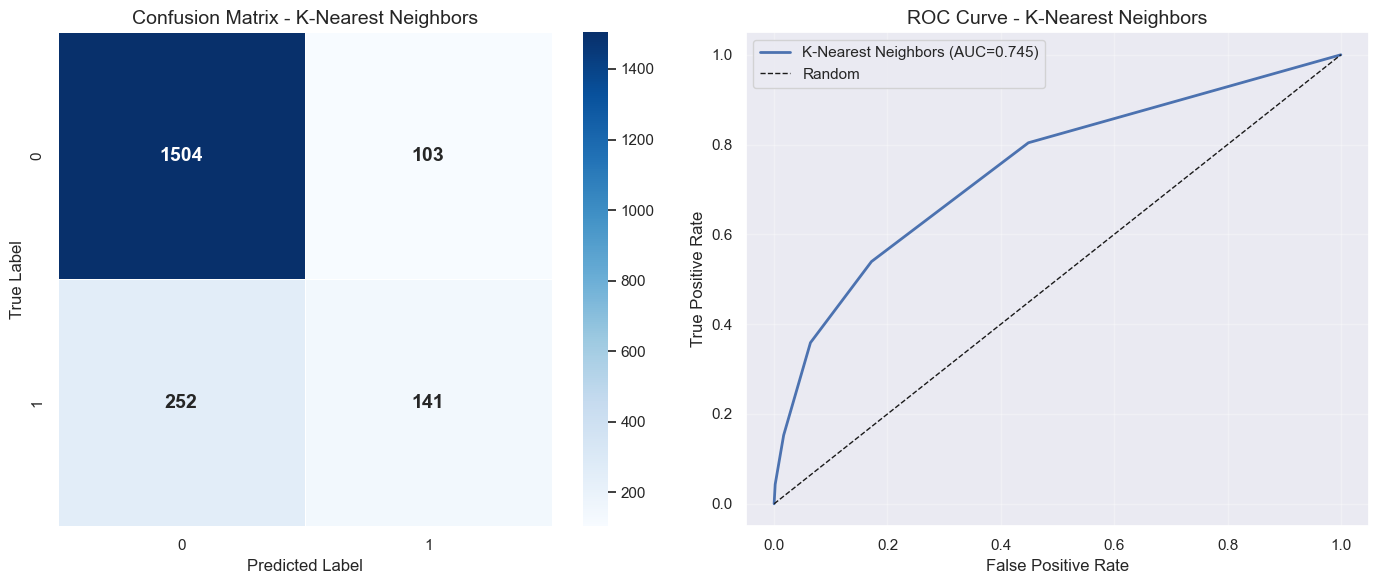

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    n_neighbors=5
)
knn_model.fit(X_train, y_train)
KNN_results = classification_evaluate_model(knn_model, X_train, X_test, y_train, y_test, "K-Nearest Neighbors")

Evaluation results: Decision Tree
--------- Accuracy ---------
Training Accuracy : 1.0000
Testing  Accuracy : 0.7935
Balanced Accuracy : 0.6860
Difference        : 0.2065
⚠️ Possible overfitting detected!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.6812
F1 (Micro) : 0.7935

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1607
           1       0.48      0.51      0.49       393

    accuracy                           0.79      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.80      0.79      0.80      2000



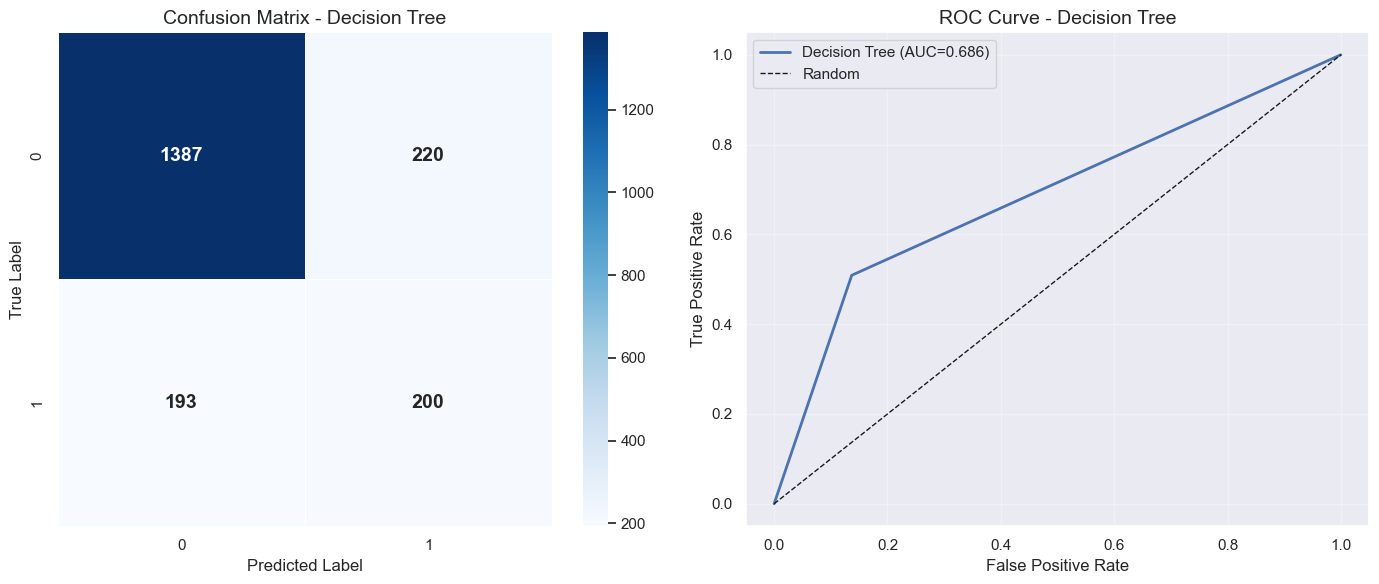

In [70]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=None,
    random_state=42
)
dt_model.fit(X_train, y_train)

DT_results = classification_evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")


In [71]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(
    lr_model, X_train, y_train,
    cv=5,
    scoring='accuracy'
)

print(f'CV Scores     : {cv_scores}')
print(f'Mean CV Score : {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})')
print(f'Most Accurate : {cv_scores.max():.4f}')

CV Scores     : [0.805    0.794375 0.818125 0.8125   0.819375]
Mean CV Score : 0.8099 (+/- 0.0185)
Most Accurate : 0.8194


Evaluation results: XGBoost
--------- Accuracy ---------
Training Accuracy : 0.9925
Testing  Accuracy : 0.8605
Balanced Accuracy : 0.7200
Difference        : 0.1320
⚠️ Possible overfitting detected!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.7478
F1 (Micro) : 0.8605

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



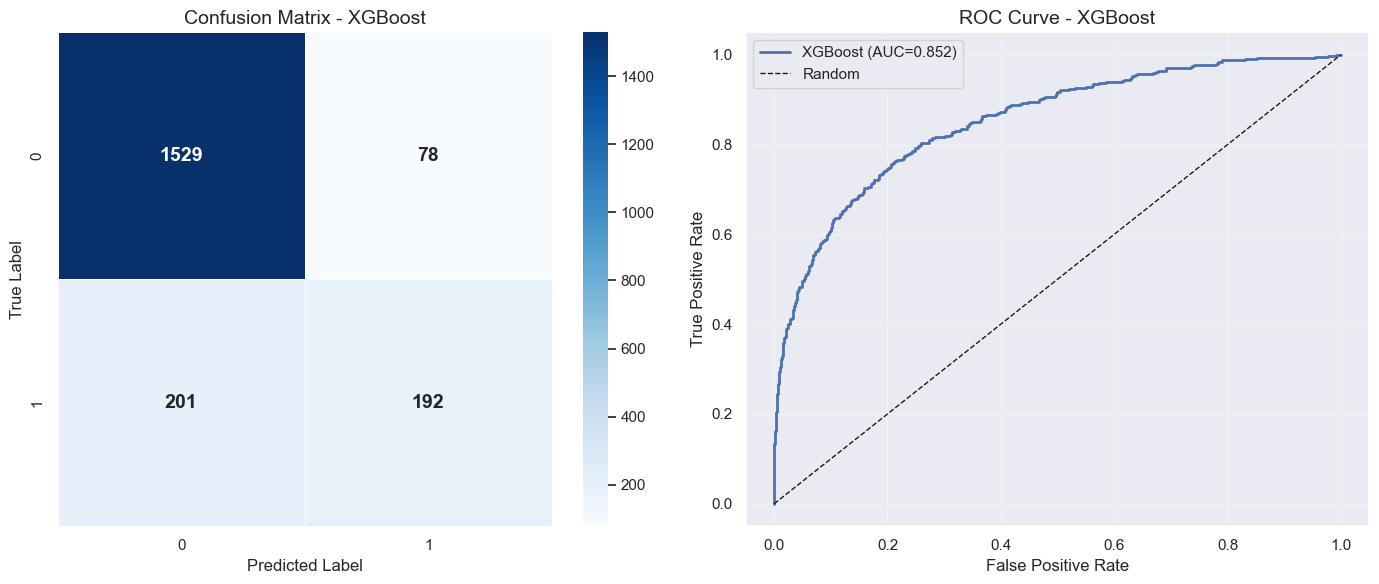

In [72]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    colsample_bylevel=0.8,
    tree_method="hist",
    grow_policy="depthwise",
    scale_pos_weight=1,
    random_state=42,
    n_jobs=-1,
    eval_metric="auc",
    verbosity=0,
    enable_categorical=True
)

xgb_model.fit(X_train, y_train)

xgb_results = classification_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205500 -> initscore=-1.352267
[LightGBM] [Info] Start training from score -1.352267
Evaluation results: LightGBM
--------- Accuracy ---------
Training Accuracy : 0.9386
Testing  Accuracy : 0.8565
Balanced Accuracy : 0.7079
Difference        : 0.0821
⚠️ Possible overfitting detected!

--------- Extra Metrics (Test Set) ---------
F1 (Macro) : 0.7367
F1 (Micro) : 0.8565

--------- Classification Report ---------
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
        

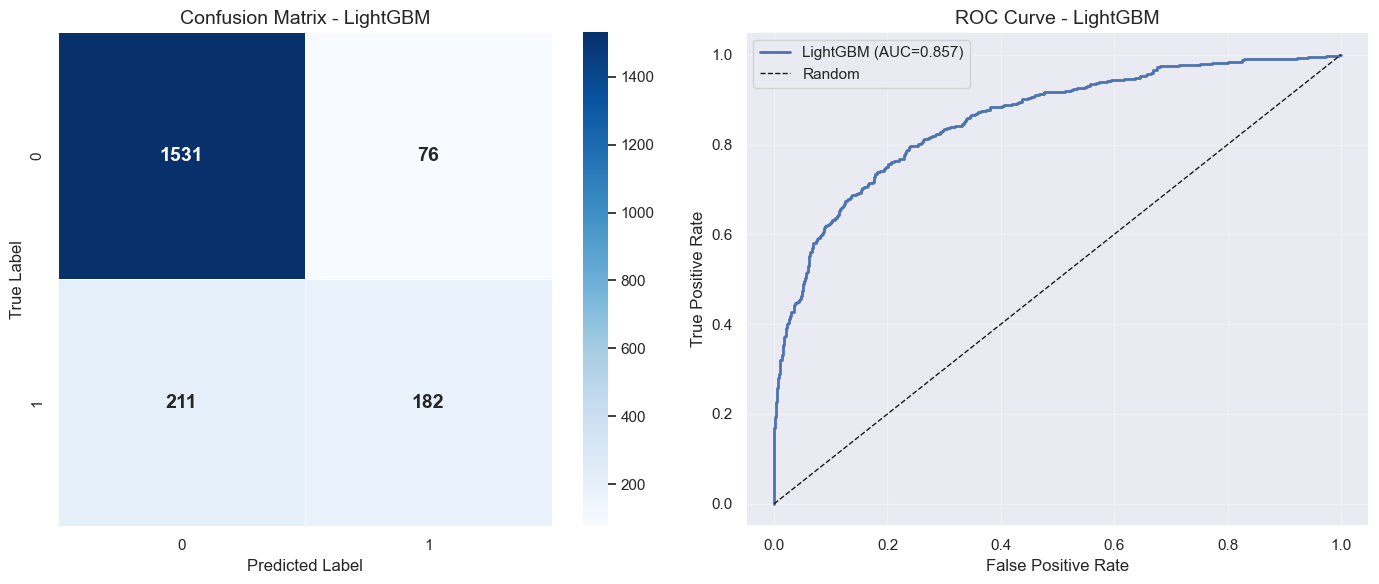

In [73]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1,
    class_weight=None,
    boosting_type="gbdt",
    objective="binary",
    metric="auc"
)

lgbm_model.fit(X_train, y_train)

lgbm_results = classification_evaluate_model(lgbm_model, X_train, X_test, y_train, y_test, "LightGBM")